In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('itineraries_sample_500.csv')

In [3]:
df['day_to_dep'] = pd.to_datetime(df['flightDate']) - pd.to_datetime(df['searchDate'])
df['day_to_dep'].head(50)

0     2 days
1     9 days
2     5 days
3     1 days
4     4 days
5     5 days
6     8 days
7     6 days
8     3 days
9    12 days
10    8 days
11   11 days
12    4 days
13    8 days
14   11 days
15    2 days
16    7 days
17    5 days
18    7 days
19   10 days
20    5 days
21    2 days
22    6 days
23   11 days
24    4 days
25    4 days
26    1 days
27    7 days
28    3 days
29    1 days
30    4 days
31    8 days
32    4 days
33    1 days
34    1 days
35    7 days
36    8 days
37    6 days
38    3 days
39    3 days
40    4 days
41   10 days
42   10 days
43    1 days
44    1 days
45    1 days
46   10 days
47    1 days
48    7 days
49    1 days
Name: day_to_dep, dtype: timedelta64[ns]

In [4]:
# Group by startingAirport, destinationAirport, and flightDate, and count the number of flights
top_flights = df.groupby(['startingAirport', 'destinationAirport', 'flightDate']).size().reset_index(name='flight_count')

# Sort by flight_count in descending order and get the top 10
top_flights = top_flights.sort_values(by='flight_count', ascending=False).head(10)

print(top_flights)

      startingAirport destinationAirport  flightDate  flight_count
32769             LGA                ORD  2022-09-13            47
1796              ATL                LAX  2022-08-30            47
27642             LAX                BOS  2022-08-21            46
32140             LGA                LAX  2022-09-21            44
29372             LAX                LGA  2022-09-13            44
29367             LAX                LGA  2022-09-08            44
27421             LAX                ATL  2022-08-12            44
29971             LAX                ORD  2022-08-09            43
1806              ATL                LAX  2022-09-09            43
30002             LAX                ORD  2022-09-09            42


In [31]:
# Group the dataframe by departure airport, arrival airport, and departure date
grouped = df.groupby(['startingAirport', 'destinationAirport'])

# Extract unique flight identifiers
unique_flights = list(grouped.groups.keys())  # List of (start_airport, dest_airport, dep_date) tuples

# Select 10 unique flights
selected_flights = unique_flights[:10]  # Modify this if you want a random selection

# List to store DataFrames
flight_price_changes = []

# Iterate through selected flights
for flight in selected_flights:
    # start_airport, dest_airport, dep_date = flight
    start_airport, dest_airport = flight
    
    # Get the corresponding DataFrame
    flight_df = grouped.get_group(flight).copy()
    
    # Sort by days to departure
    flight_df = flight_df.sort_values(by='day_to_dep')
    
    # Append to list
    flight_price_changes.append(flight_df)

# Print the first few rows of each DataFrame in the list
for i, flight_df in enumerate(flight_price_changes):
    print(f"Flight {i+1}:")
    print(flight_df.head(), "\n")

Flight 1:
                                   legId  searchDate  flightDate  \
265868  1b24e4d54f7c8d28063d298ed47e23f2  2022-08-04  2022-08-05   
372668  ce88de3ce7239c38c6dcfb0dc604ce7a  2022-09-09  2022-09-10   
380736  d17b007cc10e1369c8c784a50e74d956  2022-09-09  2022-09-10   
212001  e3e40b3b6af11d461414937372dc7366  2022-08-29  2022-08-30   
199297  4fbd160789722372f5d3c4c6da7e6cc9  2022-07-25  2022-07-26   

       startingAirport destinationAirport fareBasisCode travelDuration  \
265868             ATL                BOS      G0AIZNN1        PT6H59M   
372668             ATL                BOS      KA0NX0MC        PT2H36M   
380736             ATL                BOS      G0AJZNN1        PT6H52M   
212001             ATL                BOS      UA0NX0MQ       PT10H33M   
199297             ATL                BOS      G0AIZNN1        PT4H39M   

        elapsedDays  isBasicEconomy  isRefundable  ...  \
265868            0           False         False  ...   
372668            0 

[                                   legId  searchDate  flightDate  \
265868  1b24e4d54f7c8d28063d298ed47e23f2  2022-08-04  2022-08-05   
372668  ce88de3ce7239c38c6dcfb0dc604ce7a  2022-09-09  2022-09-10   
380736  d17b007cc10e1369c8c784a50e74d956  2022-09-09  2022-09-10   
212001  e3e40b3b6af11d461414937372dc7366  2022-08-29  2022-08-30   
199297  4fbd160789722372f5d3c4c6da7e6cc9  2022-07-25  2022-07-26   
...                                  ...         ...         ...   
134716  05826df8e1a76da9d53924bfe6f7d1bc  2022-05-09  2022-07-08   
315495  9f464b3cb2e1d5e178790c959053091d  2022-07-19  2022-09-17   
396178  d37f66af664108c7d51bcab3c081d798  2022-07-27  2022-09-25   
126977  280db079ba41fd6252bab00bdd103818  2022-05-21  2022-07-20   
220178  69b78fdc48060a0cb7b75080d07e64a0  2022-06-10  2022-08-09   

       startingAirport destinationAirport fareBasisCode travelDuration  \
265868             ATL                BOS      G0AIZNN1        PT6H59M   
372668             ATL            

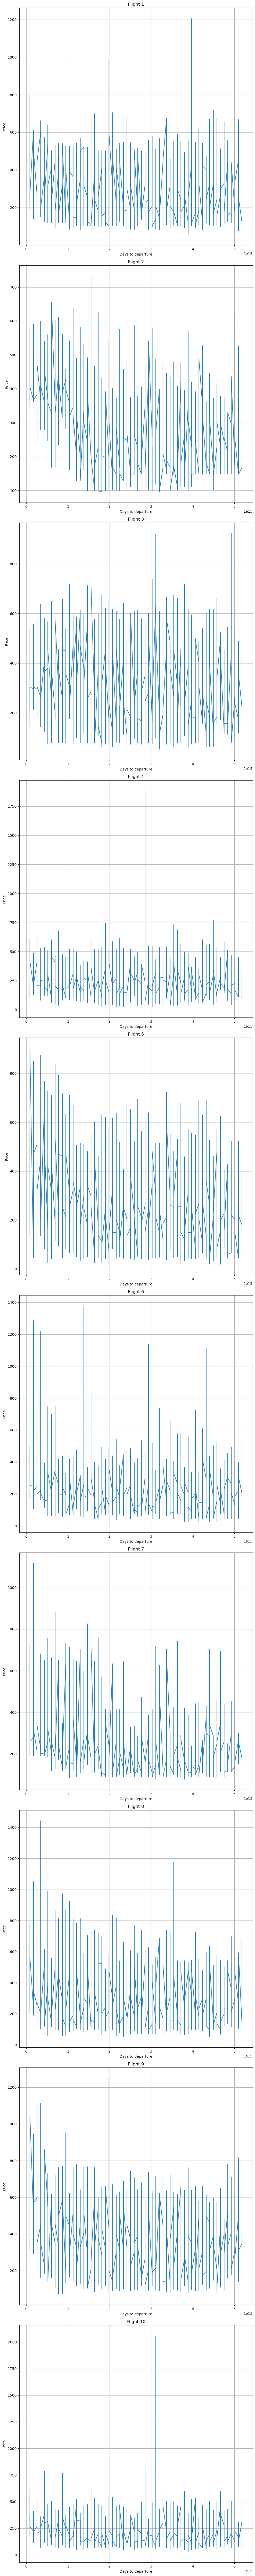

In [32]:
print(flight_price_changes)
size = len(flight_price_changes)

# Plot the price changes for each flight
fig, axs = plt.subplots(size, 1, figsize=(10, 10*size))

for i, flight_df in enumerate(flight_price_changes):
    axs[i].plot(flight_df['day_to_dep'], flight_df['totalFare'])
    axs[i].set_title(f"Flight {i+1}")
    axs[i].set_xlabel('Days to departure')
    axs[i].set_ylabel('Price')
    axs[i].grid()

plt.tight_layout()
plt.show()

In [19]:
# Perform mean fill for flight 1
flight_price_changes[0]['totalFare'] = flight_price_changes[0]['totalFare'].fillna(flight_price_changes[0]['totalFare'].mean())

# Print the first few rows to verify
print(flight_price_changes[0].head())

                                   legId  searchDate  flightDate  \
265868  1b24e4d54f7c8d28063d298ed47e23f2  2022-08-04  2022-08-05   
372668  ce88de3ce7239c38c6dcfb0dc604ce7a  2022-09-09  2022-09-10   
380736  d17b007cc10e1369c8c784a50e74d956  2022-09-09  2022-09-10   
212001  e3e40b3b6af11d461414937372dc7366  2022-08-29  2022-08-30   
199297  4fbd160789722372f5d3c4c6da7e6cc9  2022-07-25  2022-07-26   

       startingAirport destinationAirport fareBasisCode travelDuration  \
265868             ATL                BOS      G0AIZNN1        PT6H59M   
372668             ATL                BOS      KA0NX0MC        PT2H36M   
380736             ATL                BOS      G0AJZNN1        PT6H52M   
212001             ATL                BOS      UA0NX0MQ       PT10H33M   
199297             ATL                BOS      G0AIZNN1        PT4H39M   

        elapsedDays  isBasicEconomy  isRefundable  ...  \
265868            0           False         False  ...   
372668            0           

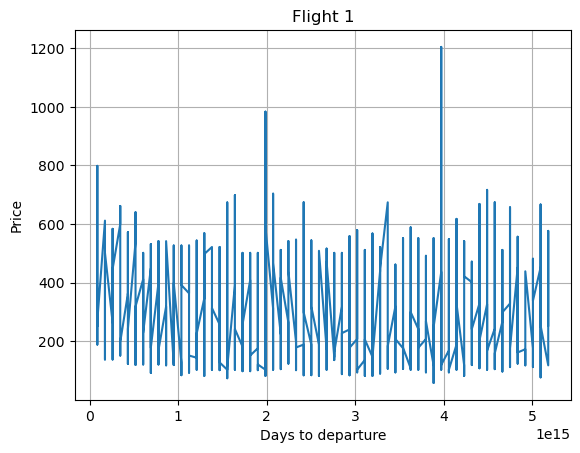

In [20]:
plt.plot(flight_price_changes[0]['day_to_dep'], flight_price_changes[0]['totalFare'])
plt.title('Flight 1')
plt.xlabel('Days to departure')
plt.ylabel('Price')
plt.grid()
plt.show()

In [21]:
# Check for missing prices in flight 1
missing_prices = flight_price_changes[0][flight_price_changes[0]['totalFare'].isnull()]

#Print number of missing prices
print("Number of missing prices in flight 1: " + str(len(missing_prices)))


Number of missing prices in flight 1: 0


In [22]:
# Perform mean fill for flight 2 to 10
for i in range(1, 10):
    flight_price_changes[i]['totalFare'] = flight_price_changes[i]['totalFare'].fillna(flight_price_changes[i]['totalFare'].mean())

# Check for missing prices in flights 2 to 10
missing_prices = pd.concat([flight_price_changes[i][flight_price_changes[i]['totalFare'].isnull()] for i in range(1, 10)])

#Print number of missing prices
print("Number of missing prices in flights 2 to 10: " + str(len(missing_prices)))

Number of missing prices in flights 2 to 10: 0


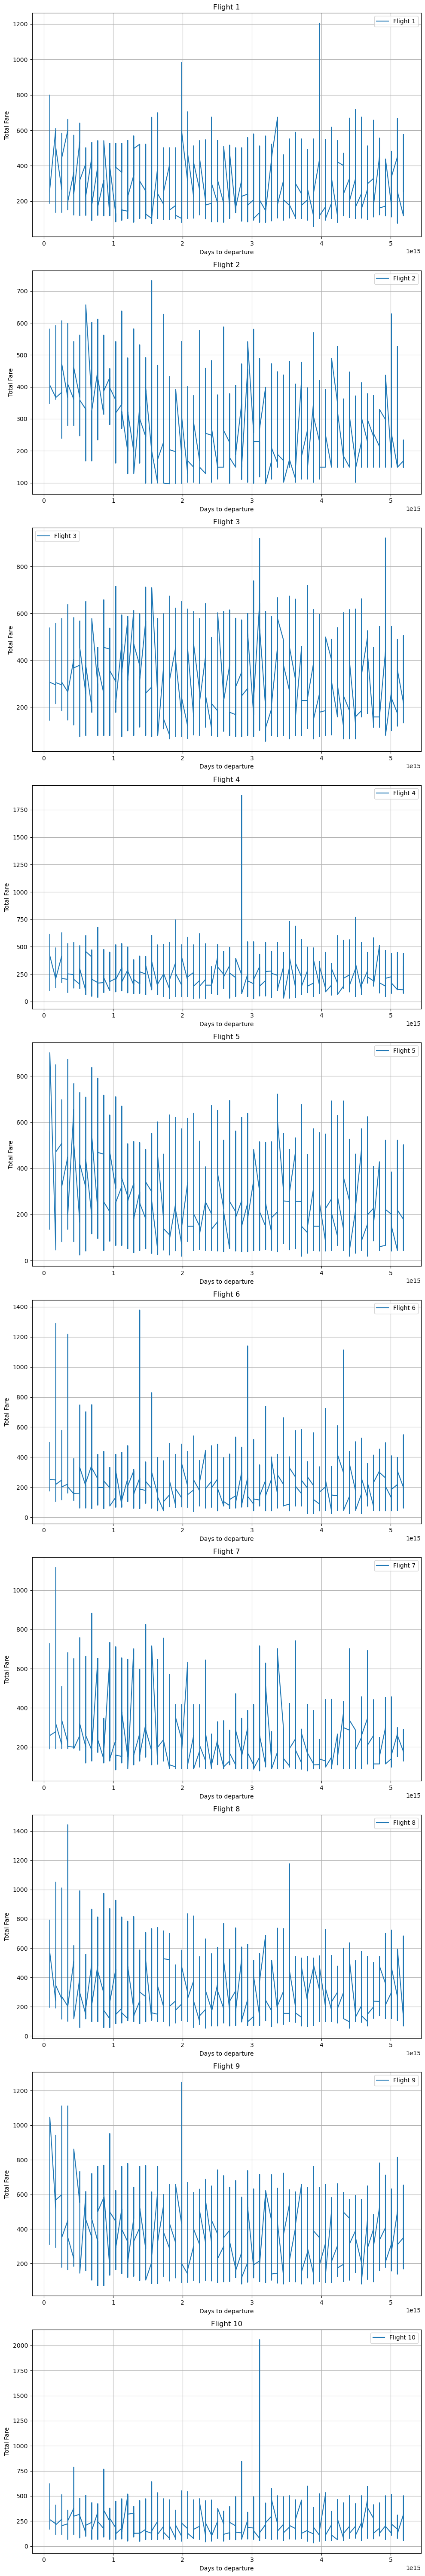

In [ ]:
fig, axs = plt.subplots(size, 1, figsize=(10, 6*size))

for i, flight_df in enumerate(flight_price_changes):
    axs[i].plot(flight_df['day_to_dep'], flight_df['totalFare'], label=f'Flight {i+1}')
    axs[i].set_xlabel('Days to departure')
    axs[i].set_ylabel('Total Fare')
    axs[i].set_title(f'Flight {i+1}')
    axs[i].legend()
    axs[i].grid()

plt.tight_layout()
plt.show()

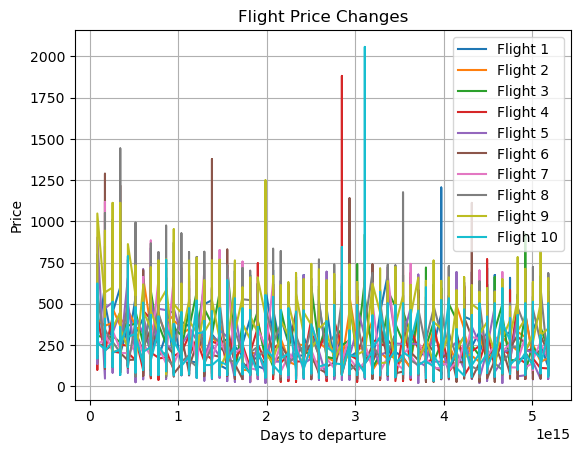

In [37]:
#Flight price changes for each flight
for i, flight_df in enumerate(flight_price_changes):
    plt.plot(flight_df['day_to_dep'], flight_df['totalFare'], label=f'Flight {i+1}')

plt.title('Flight Price Changes')
plt.xlabel('Days to departure')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [40]:
shapes = [df.shape for df in flight_price_changes]
print(shapes)

[(2996, 29), (1418, 29), (1867, 29), (1752, 29), (2310, 29), (1857, 29), (898, 29), (1836, 29), (4330, 29), (2926, 29)]


In [43]:
# Define the columns to keep
columns_to_keep = ['startingAirport', 'destinationAirport', 'totalFare', 'day_to_dep', 'flightDate']

# Update each DataFrame in the flight_price_changes list
flight_price_changes = [df[columns_to_keep] for df in flight_price_changes]

# Print the first few rows of each updated DataFrame to verify
for i, flight_df in enumerate(flight_price_changes):
    print(f"Flight {i+1}:")
    print(flight_df.head(), "\n")

Flight 1:
       startingAirport destinationAirport  totalFare day_to_dep  flightDate
265868             ATL                BOS     252.10     1 days  2022-08-05
372668             ATL                BOS     318.60     1 days  2022-09-10
380736             ATL                BOS     277.60     1 days  2022-09-10
212001             ATL                BOS     364.19     1 days  2022-08-30
199297             ATL                BOS     253.60     1 days  2022-07-26 

Flight 2:
       startingAirport destinationAirport  totalFare day_to_dep  flightDate
21058              ATL                CLT      408.6     1 days  2022-05-25
17599              ATL                CLT      408.6     1 days  2022-05-09
8204               ATL                CLT      417.6     1 days  2022-05-01
139881             ATL                CLT      453.6     1 days  2022-07-02
48333              ATL                CLT      417.6     1 days  2022-05-01 

Flight 3:
       startingAirport destinationAirport  totalFare d

In [44]:
# Grouping by startingAirport and destinationAirport and selecting the row with the maximum flight_count for each group
top_flights_unique = top_flights.loc[top_flights.groupby(['startingAirport', 'destinationAirport'])['flight_count'].idxmax()]

print(top_flights_unique)

      startingAirport destinationAirport  flightDate  flight_count
1796              ATL                LAX  2022-08-30            47
27421             LAX                ATL  2022-08-12            44
27642             LAX                BOS  2022-08-21            46
29372             LAX                LGA  2022-09-13            44
29971             LAX                ORD  2022-08-09            43
32140             LGA                LAX  2022-09-21            44
32769             LGA                ORD  2022-09-13            47


In [47]:
# Randomly selecting 10 flights from top_flights_unique
random_flights = top_flights_unique.sample(n=7, random_state=42)

print(random_flights)

      startingAirport destinationAirport  flightDate  flight_count
1796              ATL                LAX  2022-08-30            47
27421             LAX                ATL  2022-08-12            44
32140             LGA                LAX  2022-09-21            44
27642             LAX                BOS  2022-08-21            46
29971             LAX                ORD  2022-08-09            43
29372             LAX                LGA  2022-09-13            44
32769             LGA                ORD  2022-09-13            47
